In [1]:
# Monday 19 Sep 2022
#
# w03 Model comparison and hypothesis testing
#
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

obs = [1,29,3,7]
exp = [3,27,1,9]

# df = degrees of freedom
# df = 4 - 1 - ddof 
c  = 2      # 2 constraint = df = 1
df = 4-1-c

# the chi2 val
# calculated directly
#
chi2val = 0
for i in range(len(obs)):
    chi2val += (obs[i]-exp[i])*(obs[i]-exp[i])/exp[i]
print("The chi-square value calculated using the definition")
print("chi square ", chi2val, " at df = ", df)


The chi-square value calculated using the definition
chi square  5.925925925925926  at df =  1


In [2]:
# The p-value calculated using the chi2 distribution and the definition of p-value
#
pval = 1-stats.chi2.cdf(chi2val, df, loc=0, scale=1)
print("\nThe p-value calculated using the chi2 distribution and the definition of p-value")
print("chi square ", chi2val, "p-value ", pval, " at df = ", df)



The p-value calculated using the chi2 distribution and the definition of p-value
chi square  5.925925925925926 p-value  0.014919696305821906  at df =  1


In [3]:
# the chi2 val
# calculated using the chisquare function in numpy
#
c = 2
chi2vala, pvala = stats.chisquare(obs, exp, ddof=c)
print("\nThe p-value calculated using the numpy function chisquare")
print("chi square ", chi2vala, "p-value ", pvala, " at df = ", df)



The p-value calculated using the numpy function chisquare
chi square  5.925925925925926 p-value  0.014919696305821892  at df =  1


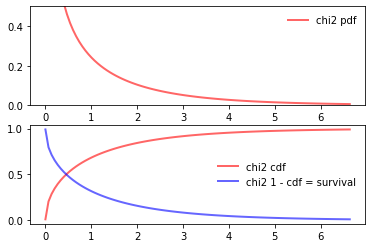

In [4]:
df = 1
# The chisquare distribution
#
fig, ax = plt.subplots(2, 1)
x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)

# the PDF
ax[0].plot(x, stats.chi2.pdf(x, df), 'r-', lw=2, alpha=0.6, label='chi2 pdf')
ax[0].legend(loc='best', frameon=False)
ax[0].set_ylim([0,0.5])

# CDF   
#
# 1-CDF = Survival = p-value
#
ax[1].plot(x, stats.chi2.cdf(x, df), 'r-', lw=2, alpha=0.6, label='chi2 cdf')
ax[1].plot(x, stats.chi2.sf(x, df),  'b-', lw=2, alpha=0.6, label='chi2 1 - cdf = survival')
ax[1].legend(loc='best', frameon=False)
plt.show()




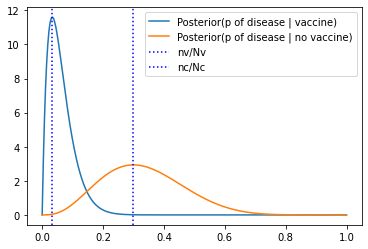

In [5]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import math

def binomial_pdata(f, N, n):
    ff = 1.0 - f # probability of not contracting disease
    
    # (N)!/n! (N-n)!
    coeff  = math.factorial(N)
    coeff /= math.factorial(N-n)
    coeff /= math.factorial(n)
    
    # log[(N)!] - log[n!] - log[N-n)!]
    logcoeff  = np.log(float(math.factorial(N)))
    logcoeff -= np.log(float(math.factorial(N-n)))
    logcoeff -= np.log(float(math.factorial(n)))
                      
    
    #pdf = coeff * f^n * (1-f)^{N-n}
    pdf  = np.exp(logcoeff + n*np.log(f) + (N-n)*np.log(ff))
    return pdf

def binomial_posterior(f, N, n):
    ff = 1.0 - f # probability of not contracting disease
    
    # (N+1)!/n! (N-n)!
    coeff  = math.factorial(N+1)
    coeff /= math.factorial(N-n)
    coeff /= math.factorial(n)
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.log(float(math.factorial(N+1)))
    logcoeff -= np.log(float(math.factorial(N-n)))
    logcoeff -= np.log(float(math.factorial(n)))
                      
    # pdf = coeff * f^n * (1-f)^{N-n}
    pdf  = np.exp(logcoeff + n*np.log(f) + (N-n)*np.log(ff))
    return pdf


#integration range
#
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3  # no vaccine and contracted plague

f_max  = 0.9999999999
f_min  = 0.0000000001
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) # the probability of contracting disease

# the posteriors: P(f_v) and P(f_c)
#
pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

# max value
#  
f_v_max = nv/Nv
f_c_max = nc/Nc

plt.plot(f, pdf_v, label = "Posterior(p of disease | vaccine)")
plt.plot(f, pdf_c, label = "Posterior(p of disease | no vaccine)")
plt.axvline(x=f_v_max, color='b', ls=':', label='nv/Nv')
plt.axvline(x=f_c_max, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()

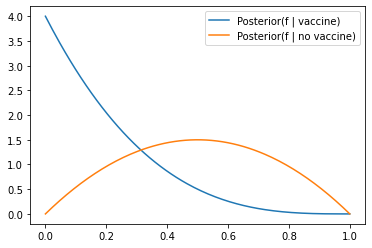

In [6]:
Nv = 3 # volunteers that have recieved the vaccine
Nc = 2 # volunteers in control group (no vaccine)
nv = 0 # received vaccine and contracted disease
nc = 1 # no vaccine and contracted disease

f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) # the probability of contracting disease

pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

plt.plot(f, pdf_v, label = "Posterior(f | vaccine)")
plt.plot(f, pdf_c, label = "Posterior(f | no vaccine)")
plt.legend(loc="upper right")
plt.show()

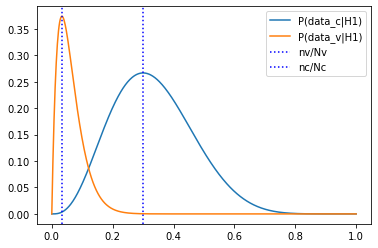

P(D|H1) =  0.002913377426545048


In [61]:
# P(data|H1 [f_v not_eq f_c])
#
#
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3  # no vaccine and contracted plague

#integration range
#
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) # the probability of contracting disease

pdata_v  = binomial_pdata(f, Nv, nv)
pdata_c  = binomial_pdata(f, Nc, nc)
plt.plot(f, pdata_c, label = "P(data_c|H1)")
plt.plot(f, pdata_v, label = "P(data_v|H1)")
plt.axvline(x=nv/Nv, color='b', ls=':', label='nv/Nv')
plt.axvline(x=nc/Nc, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()

pdata_H1 = 0
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        pdata_H1 += pdata_v[bv]*pdata_c[bc] * f_bin * f_bin 
 
print("P(D|H1) = ", pdata_H1)


In [65]:
# P(data | H0)
# fc = fv
#

pdata_H0 = 0
for b in range(f_nbin):
    pdata_H0 += pdata_v[b]*pdata_c[b]
pdata_H0 *= f_bin

print("P(data|H0) = ", pdata_H0)

# P(H1|data) / P(H00|data) = P(data|H1) / P(data|H0-)
#
print("H1/H0  = ", pdata_H1/pdata_H0)


P(data|H0) =  0.0009577496063677775
H1/H0  =  3.041898850362258


In [64]:
# P(fv < fc| data)
#
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted plague
nc = 3  # no vaccine and contracted plague

f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) # the probability of contracting disease
pdf_v  = binomial_posterior(f, Nv, nv)
pdf_c  = binomial_posterior(f, Nc, nc)

sum0 = 0
sum1 = 0
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        sum0  += pdf_v[bv]*pdf_c[bc]
        if fv < fc:
            sum1  += pdf_v[bv]*pdf_c[bc]
                 
sum0 *= f_bin * f_bin         
sum1 *= f_bin * f_bin        
print("P(fv noteq fc) = ", sum0)
print("P(fv < fc) = ", sum1)

  

P(fv noteq fc) =  0.993461702451853
P(fv < fc) =  0.9806714796684102


In [10]:
# V 10 times more efficient than C
#
# P(fv < fc/10 | data)
#
# 
prob  = 0
times = 10
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv < fc/times:
            prob += pdf_v[bv]*pdf_c[bc]
            
prob *= f_bin*f_bin            
print("P(f_v < fc/", times, ") =", prob)
  

P(f_v < fc/ 10 ) = 0.2741924036395801


In [68]:
# P([fc-fv| < epsilon])
prob  = 0
epsilon = 0.1
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv < fc + epsilon and fv > fc - epsilon:
            prob += pdf_v[bv]*pdf_c[bc]
            
prob *= f_bin*f_bin            
print("P(|fc - fv | < ", epsilon, ") =", prob)


P(|fc - fv | <  0.1 ) = 0.1000923572029194


In [71]:
# P([fc-fv| > epsilon])
prob  = 0
epsilon = 0.1
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        if fv > fc + epsilon or fv < fc - epsilon:
            prob += pdf_v[bv]*pdf_c[bc]
            
prob *= f_bin*f_bin            
print("P(|fc - fv | > ", epsilon, ") =", prob)


P(|fc - fv | >  0.1 ) = 0.8933693452489823


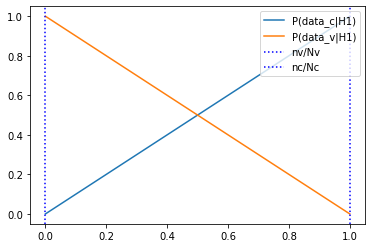

P(D|H1) =  0.24502500000000016


In [11]:
# When there is really really little data
#
#
Nv = 1 # volunteers that have received the vaccine
Nc = 1 # volunteers in control group (no vaccine)
nv = 0  # received vaccine and contracted plague
nc = 1  # no vaccine and contracted plague

# P(data|H1 [f_v not_eq f_c])
#
#
#integration range
#
f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) # the probability of contracting disease

pdata_v  = binomial_pdata(f, Nv, nv)
pdata_c  = binomial_pdata(f, Nc, nc)
plt.plot(f, pdata_c, label = "P(data_c|H1)")
plt.plot(f, pdata_v, label = "P(data_v|H1)")
plt.axvline(x=nv/Nv, color='b', ls=':', label='nv/Nv')
plt.axvline(x=nc/Nc, color='b', ls=':', label='nc/Nc')

plt.legend(loc="upper right")
plt.show()

pdata_H1 = 0
for bc in range(f_nbin):
    fc = f_min + bc*f_bin
    
    for bv in range(f_nbin):
        fv = f_min + bv*f_bin
        
        pdata_H1 += pdata_v[bv]*pdata_c[bc]
             
pdata_H1 *= f_bin*f_bin                       
print("P(D|H1) = ", pdata_H1)


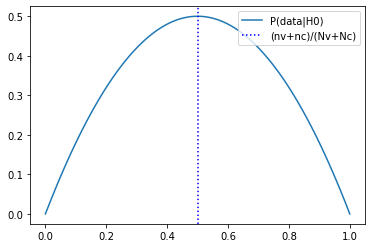

P(data|H0) =  0.16331632656428569
H1/H0 =  1.5003092780411746


In [12]:
# P(data | H0)
#
Nv = 1 # volunteers that have received the vaccine
Nc = 1 # volunteers in control group (no vaccine)
nv = 0  # received vaccine and contracted plague
nc = 1  # no vaccine and contracted plague

f_bin  = 1/(100*np.sqrt(max(Nv,Nc)))
f_nbin = int((f_max-f_min)/f_bin)
f      = np.linspace(f_min, f_max, f_nbin) # the probability of contracting disease

pdata_vc = binomial_pdata(f, Nv+Nc, nv+nc)
plt.plot(f, pdata_vc, label = "P(data|H0)")
plt.axvline(x=(nv+nc)/(Nv+Nc), color='b', ls=':', label='(nv+nc)/(Nv+Nc)')
plt.legend(loc="upper right")
plt.show()

pdata_H0 = 0
for b in range(f_nbin):
    pdata_H0 += pdata_v[b]*pdata_c[b]
pdata_H0 *= f_bin
print("P(data|H0) = ", pdata_H0)

# P(H1|data) / P(H0|data) = P(data|H1) / P(data|H0)
#
print("H1/H0 = ", pdata_H1/pdata_H0)

